In [2]:
%pip install -U kaleido
%pip list | grep kaleido
%pip install pydot
%pip install graphviz
%pip install keras_tuner

import matplotlib.pyplot as plt
import pandas as pd

train_dir = "/Users/lina/Desktop/ba-implementation/train"
filtered_dir = "/Users/lina/Desktop/ba-implementation/train/5d27075f03f801723c2e360f/F1_filtered/"

Note: you may need to restart the kernel to use updated packages.
kaleido                   0.2.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Heuristics
1. For each current AP, choose one random out of the five nearest APs and check if the next and the random one are identical
2. same for next 3

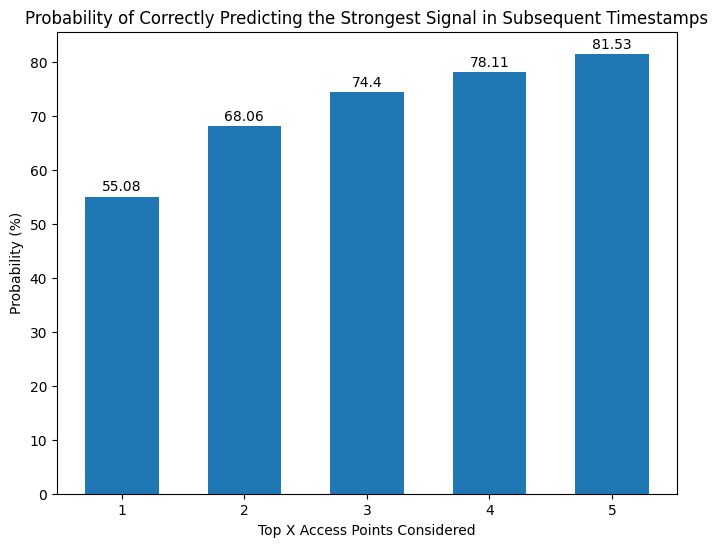

In [3]:
def aggregated_heuristic(size):
    total_correct_guesses = 0
    total_rows = 0 

    for i in range(147):
        file_name = filtered_dir + f"floor_metric_interpolated_waypoints_acce_{i}_merged_data_acce.csv"
        df = pd.read_csv(file_name)
        df = df.iloc[:, [0] + list(range(7, df.shape[1]))]
        
        for j in range(1, len(df)-1):
            top_size_values = df.iloc[j, 1:].nlargest(size)
            top_size_cols = set(top_size_values.index)
            
            # Check if the index of the max value of the next row is in the top x columns of the current row
            if df.iloc[j+1, 1:].idxmax() in top_size_cols:
                total_correct_guesses += 1
            
            total_rows += 1

    aggregated_heuristic_value = total_correct_guesses / total_rows
    return aggregated_heuristic_value

sizes = list(range(1, 6))
heuristic_values = [aggregated_heuristic(size) * 100 for size in sizes]

plt.figure(figsize=(8, 6))
bars = plt.bar(sizes, heuristic_values, width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.title("Probability of Correctly Predicting the Strongest Signal in Subsequent Timestamps")
plt.xlabel("Top X Access Points Considered")
plt.ylabel("Probability (%)")
plt.savefig("heuristic_plot.pdf")
plt.show()


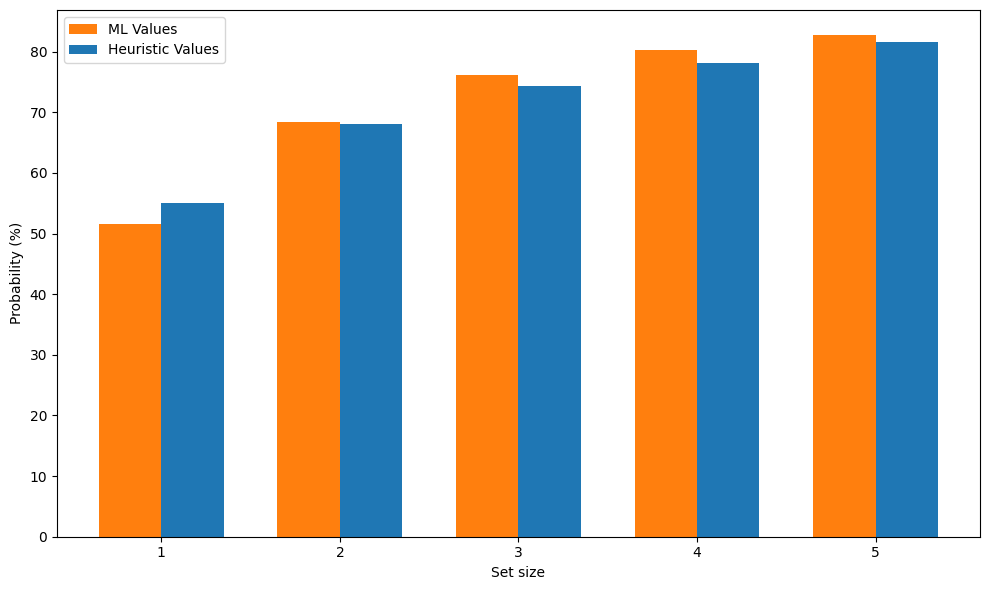

In [6]:
# Plot complete comparison with ml_values and heuristic_values

ml_values = [51.56, 68.34, 76.09, 80.30, 82.72]

bar_width = 0.35
index = range(len(ml_values))
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, ml_values, bar_width, label='ML Values', color='C1')
bar2 = plt.bar([i + bar_width for i in index], heuristic_values, bar_width, label='Heuristic Values', color='C0')
plt.xlabel('Set size')
plt.ylabel('Probability (%)')
plt.xticks([i + bar_width/2 for i in index], ['1', '2', '3', '4', '5'])
plt.legend()
plt.tight_layout()
plt.savefig("comparison_ml_heuristic_1_to_5.pdf")
plt.show()

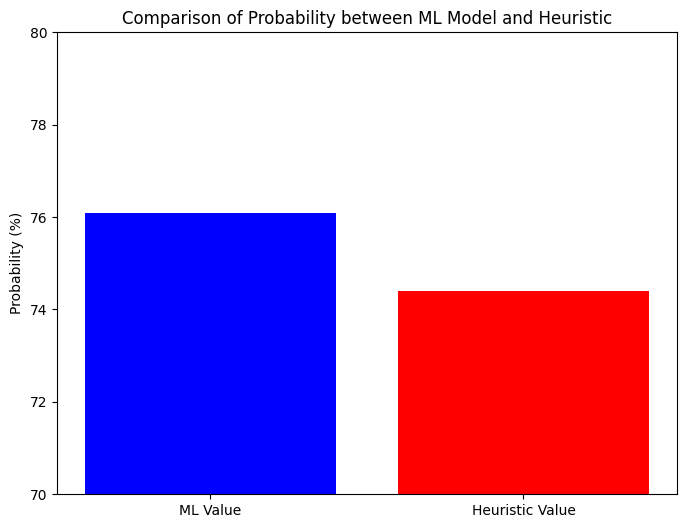

In [11]:
# Plot top 3

labels = ['ML Value', 'Heuristic Value']
values = [ml_value_3, heuristic_value_3]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['C1', 'C0'])
plt.ylabel('Probability (%)')
plt.title('Comparison of Probability between ML Model and Heuristic')
plt.ylim(70, 80) 
plt.savefig("comparison_ml_heuristic_3.pdf")

### Get the time for selecting the three maximums in recent APs

In [11]:
import time

file = filtered_dir + "floor_metric_interpolated_waypoints_acce_1_merged_data_acce.csv"

start_time = time.time()

df = pd.read_csv(file)
df = df.iloc[:, list(range(7, df.shape[1]))]
df = df.head(1)
values = df.T[0].nlargest(3)
bssids = values.index

end_time = time.time()

print("Duration:", end_time - start_time, "seconds")
print(bssids)

Duration: 0.07589983940124512 seconds
Index(['27a2117236a35ee92c6eb925f0195b59f2fcc034',
       'c89db743bbec414085f3db50bbf2ce70f0a13846',
       'd091c86c2295f29e0c1ff1749d43d3b05340958e'],
      dtype='object')
